### Importing data from my SQL ###

In [60]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\harsh\anaconda3\lib\site-packages\fonttools-4.47.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\harsh\anaconda3\lib\site-packages\zomato_delivery_project-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [46]:
import mysql.connector
from mysql.connector import Error
import pandas as pd


In [47]:
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "Mohit@7117",
    "database": "model",
}


In [49]:
query = "SELECT * FROM model.qsar_fish_toxicity"

try:
    cursor.execute(query)
    records = cursor.fetchall()
    print(f"Total rows: {cursor.rowcount}")
except Error as e:
    print("Error fetching data from MySQL table", e)


Total rows: 908


In [48]:
try:
    connection = mysql.connector.connect(**db_config)
    if connection.is_connected():
        cursor = connection.cursor()
        print("Connected to MySQL database")
except Error as e:
    print("Error while connecting to MySQL", e)


Connected to MySQL database


In [51]:
from IPython.display import display

column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(records, columns=column_names)




,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [52]:
df.to_csv("qsar_fish_toxicity.csv", index=False)


### EDA ###

In [43]:
from  sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

### We can directly call df from above or we can import from the file we created ###

In [56]:
df=pd.read_csv(r"C:\LC50_toxicity_prediction\notebook\qsar_fish_toxicity.csv", sep=',')

In [57]:
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       908 non-null    float64
 1   SM1_Dz(Z)  908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdsCH      908 non-null    int64  
 4   NdssC      908 non-null    int64  
 5   MLOGP      908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [59]:
numerical_columns=df.columns[df.dtypes!="object"]
print (numerical_columns)

Index(['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50'], dtype='object')


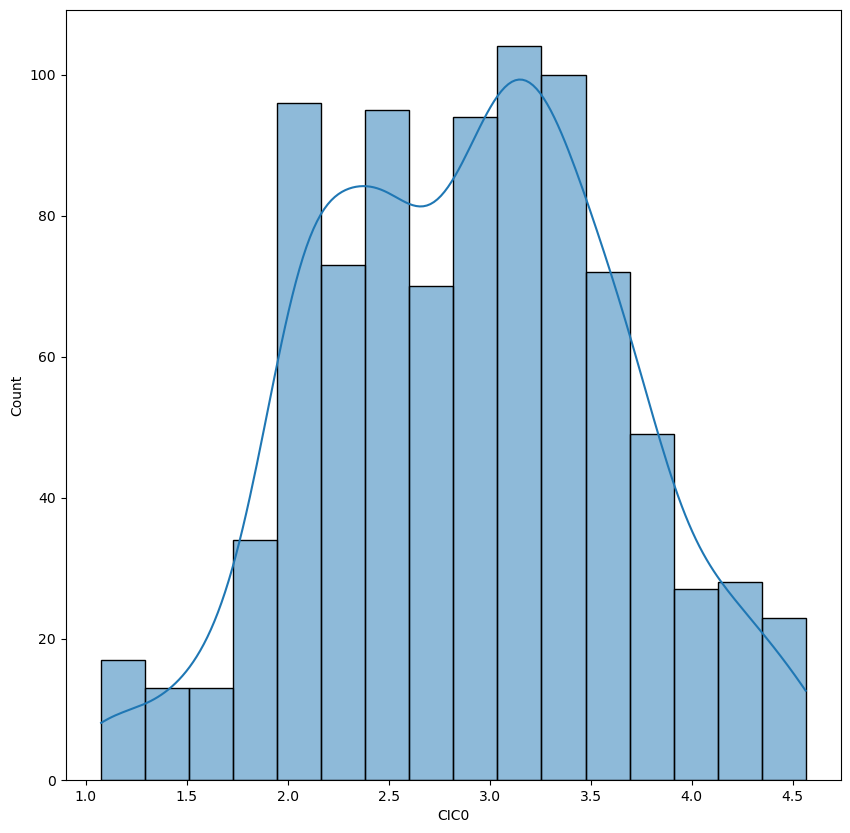

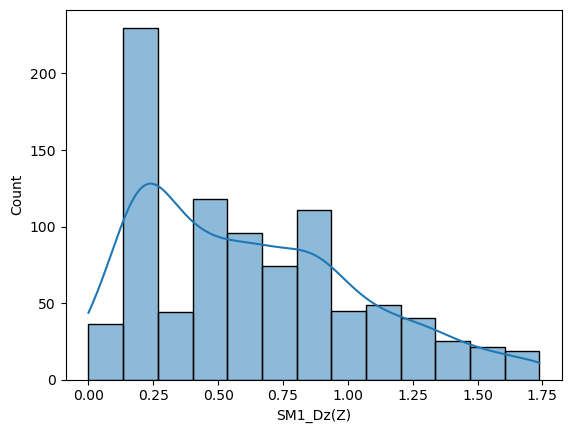

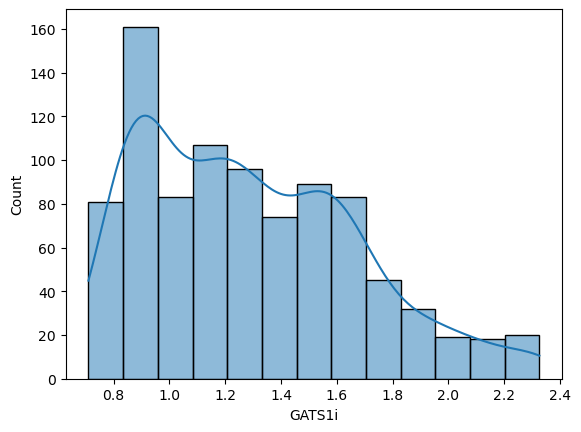

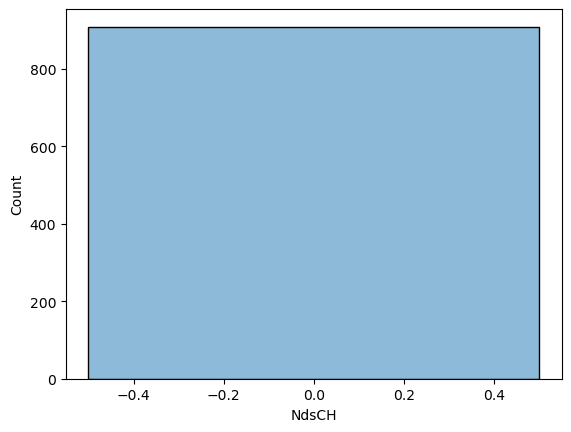

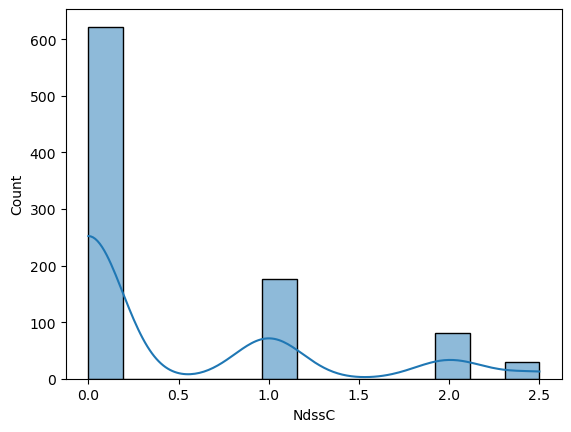

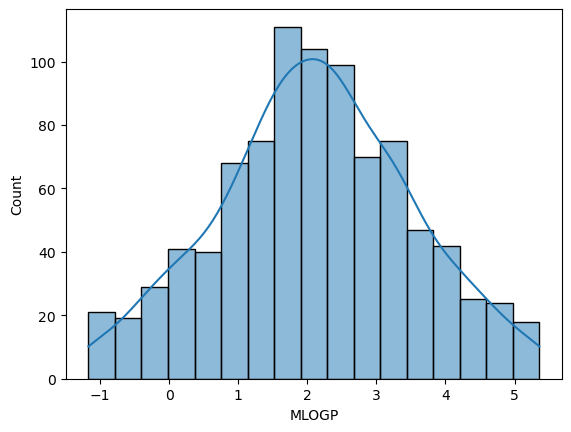

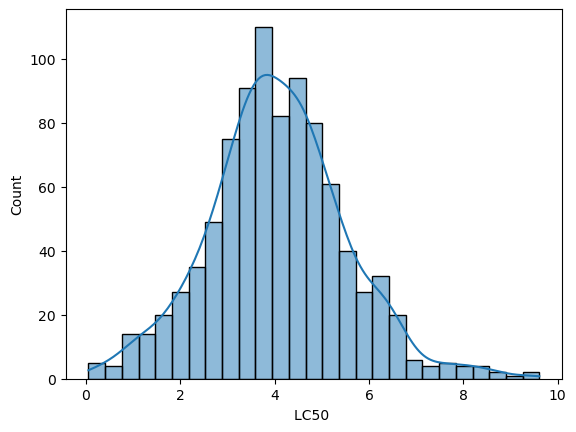

In [42]:
plt.figure(figsize=(10,10))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [8]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [9]:
df.corr(method="pearson")

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50,0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


In [10]:
df.isnull().sum()

CIC0         0
SM1_Dz(Z)    0
GATS1i       0
NdsCH        0
NdssC        0
MLOGP        0
LC50         0
dtype: int64

In [11]:
X=df.iloc[:, :6].values
Y=df.iloc[:,6].values

In [12]:
print (X)

[[3.26  0.829 1.676 0.    1.    1.453]
 [2.189 0.58  0.863 0.    0.    1.348]
 [2.125 0.638 0.831 0.    0.    1.348]
 ...
 [3.763 0.916 0.878 0.    6.    2.918]
 [2.831 1.393 1.077 0.    1.    0.906]
 [4.057 1.032 1.183 1.    3.    4.754]]


In [13]:
print (Y)

[3.77  3.115 3.531 3.51  5.39  1.819 3.947 3.513 4.402 3.021 3.21  2.371
 3.919 3.03  2.736 2.157 2.413 0.898 0.45  3.733 2.976 6.535 5.643 4.629
 4.838 4.081 3.436 3.45  1.102 4.257 5.386 3.393 1.308 3.554 2.269 4.165
 5.896 4.829 4.59  2.092 3.665 3.56  4.805 3.174 7.899 2.67  4.016 3.857
 5.522 4.851 3.84  4.586 5.284 3.559 4.091 4.33  3.755 4.552 3.62  4.459
 2.827 6.38  4.786 3.861 3.262 6.297 3.546 2.92  3.203 2.283 1.559 3.47
 4.748 2.576 5.259 4.564 4.37  0.053 2.381 2.891 1.088 3.721 3.701 6.083
 4.628 3.7   1.842 3.396 2.99  3.573 2.271 2.085 3.822 3.29  3.84  3.979
 3.47  3.314 4.031 4.74  4.194 3.447 2.364 3.645 2.07  2.27  3.513 2.811
 2.832 1.639 2.016 1.651 4.097 3.123 3.231 5.052 3.572 2.436 2.567 1.795
 5.072 2.156 1.037 1.932 2.505 1.524 3.048 5.115 2.856 4.366 4.976 2.94
 4.538 3.391 2.692 3.825 3.206 1.78  0.533 3.299 2.914 1.18  3.168 3.446
 3.496 4.68  3.252 2.98  3.936 5.47  1.842 0.15  3.736 3.719 1.749 3.507
 3.979 5.363 4.396 3.984 1.02  2.973 3.182 5.055 4.82

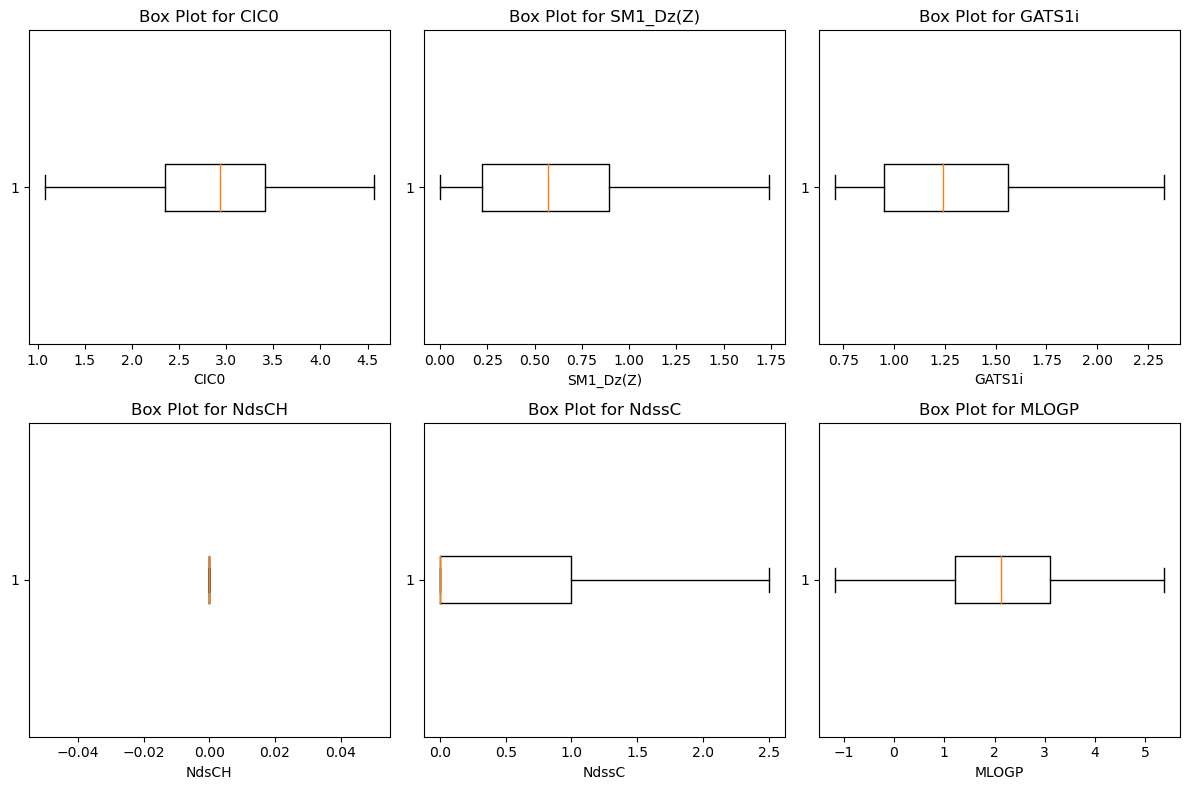

In [27]:
columns_to_plot = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP']
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


###    DATA contain outlier so we have to handle it   ###

In [21]:

def handle_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(column, lower_bound, upper_bound)

columns_to_handle_outliers = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP']


for column in columns_to_handle_outliers:
    df[column] = handle_outliers_iqr(df[column])




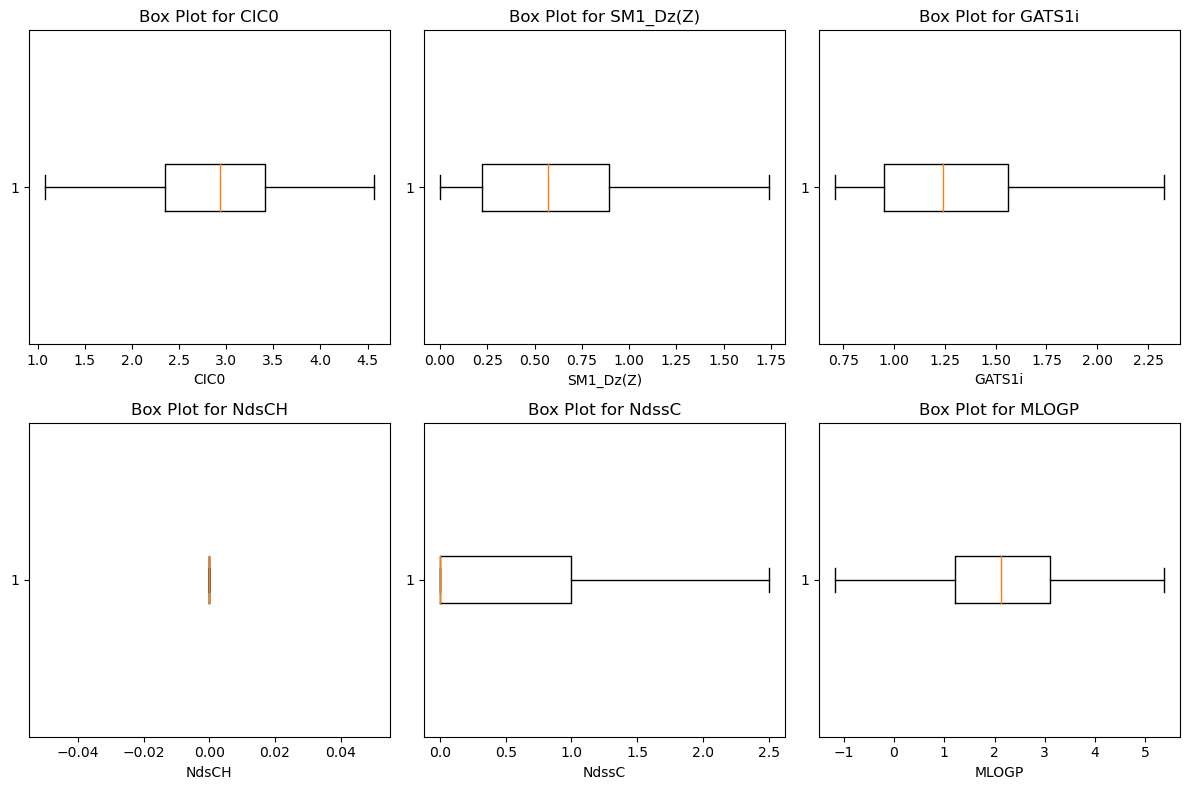

In [29]:
columns_to_plot = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP']
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


### Model training ###

In [31]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer( [
    ('num_pipeline',num_pipeline,numerical_columns)
])

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=30)

In [61]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'SVR':SVR()

}

model_list=[] 
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

    


LinearRegression
Model Training Performance
RMSE: 0.8705568900286602
MAE: 0.6443227607782905
R2 score 60.438205681085954


Lasso
Model Training Performance
RMSE: 1.228852796112934
MAE: 0.910105774718581
R2 score 21.1718397946541


Ridge
Model Training Performance
RMSE: 0.86994980505502
MAE: 0.6432466278552276
R2 score 60.4933634699683


Elasticnet
Model Training Performance
RMSE: 1.1182203870456455
MAE: 0.8199079459665667
R2 score 34.726563432949966


RandomForestRegressor
Model Training Performance
RMSE: 0.8406036654049641
MAE: 0.5734485287217678
R2 score 63.11377378814641


XGBRegressor
Model Training Performance
RMSE: 0.8558327080863701
MAE: 0.6086357955722556
R2 score 61.76514680096402


SVR
Model Training Performance
RMSE: 0.8271287724568278
MAE: 0.5843317108512689
R2 score 64.28686928083856




In [62]:
best_model_index = r2_list.index(max(r2_list))
best_model = model_list[best_model_index]
best_r2_score = r2_list[best_model_index]

print("Best Model based on R2 Score:", best_model)
print("Best R2 Score:", best_r2_score * 100)


Best Model based on R2 Score: SVR
Best R2 Score: 64.28686928083856
